In [1]:
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
import camb

In [2]:
import sys
sys.path.append('../../')

In [3]:
%load_ext autoreload
%autoreload 2
from cobi.simulation import CMB, synfast_pol
from cobi.simulation import LATsky, Mask
from cobi.quest import FilterEB
from cobi.sht import HealpixDUCC

In [4]:
dir = '/global/homes/l/lonappan/scratch/CB'
alpha = [-0.1,-0.1,0.2,0.2,.15,.15]
alpha_err = 0.1
latsky = LATsky(dir, nside=1024, cb_model='aniso',Acb=4.0e-6, AEcb=-1.0e-3,lensing=False,dust_model=0,sync_model=0,alpha=alpha,alpha_err=alpha_err,nsplits=1)

CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Anisotropic cosmic birefringence model selected


Noise : INFO - Noise Model:[LAT] White + 1/f noise v3.1.1


In [26]:
mask = Mask(latsky.basedir, latsky.nside,'LATxCOxPSxGAL', 2, gal_cut=0.8)

Mask : INFO - The given galactic cut value seems in fsky and it corresponds to 80.0% of sky
Mask : INFO - Loading composite mask
Mask : INFO - Upgrading mask LAT resolution
Mask : INFO - Upgrading mask CO resolution
Mask : INFO - Upgrading mask PS resolution
Mask : INFO - Upgrading mask GAL resolution
Mask : INFO - Composite Mask LATxCOxPSxGAL: fsky changed 0.93 -> 0.51  
Mask : INFO - Apodizing mask: scale 2: method: C2
Mask : INFO - Apodizing changed the fsky 0.514 -> 0.481


In [27]:
filt = FilterEB(latsky, lmin=100, lmax=3000, mask=mask.mask,sht_backend='d')

In [7]:
QU = filt.QU(0)

In [19]:
NL = filt.NL(0)

In [20]:
NL[0][0]

array([0.00000000e+00, 0.00000000e+00, 1.09550318e+15, ...,
       6.15170036e+17, 6.24901288e+17, 6.11878157e+17])

In [8]:
E, B = HealpixDUCC(filt.nside).map2alm(QU,lmax=filt.lmax,nthreads=8)

/tmp/ipykernel_1989910/1726517991.py:4: RuntimeWarning: divide by zero encountered in divide
  plt.loglog(1/NL[0][0], label='NL')


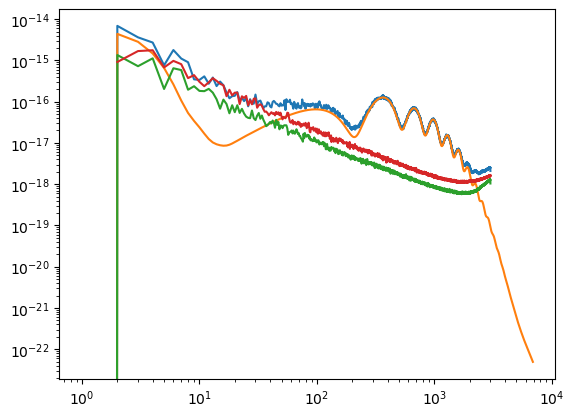

In [21]:
plt.loglog(hp.alm2cl(E)/filt.fsky, label='E')
plt.loglog(filt.cl_len[1])
plt.loglog(hp.alm2cl(B), label='B')
plt.loglog(1/NL[0][0], label='NL')

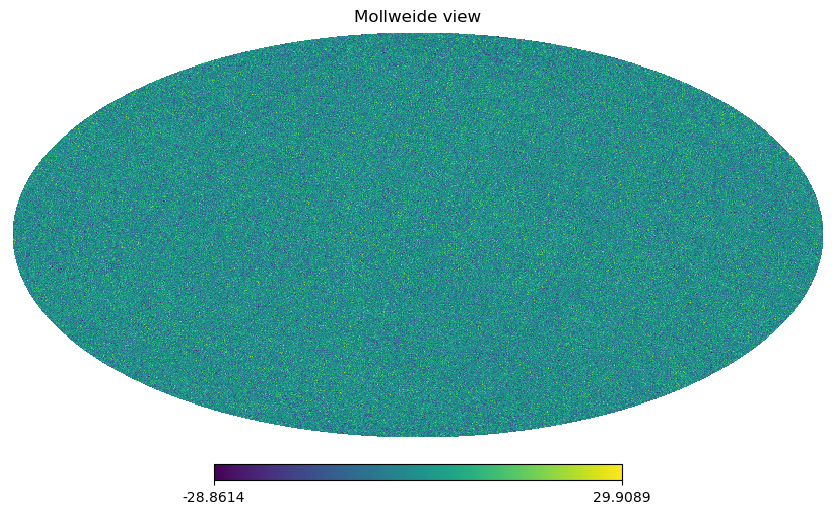

In [33]:
hp.mollview(hp.alm2map(EB[0], nside=512))

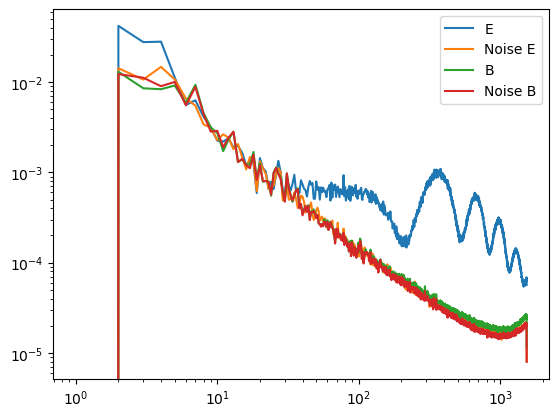

In [32]:
plt.loglog(hp.alm2cl(EB[0]), label='E')
plt.loglog(Nl[0], label='Noise E')
plt.loglog(hp.alm2cl(EB[1]), label='B')
plt.loglog(Nl[1], label='Noise B')
plt.legend()

In [17]:
A1 = cmb_aniso.alpha_map(1)

In [9]:
elm,blm = hp.map2alm_spin([Q,U],spin=2,)

In [18]:
elm1, blm1 = hp.map2alm_spin([Q1,U1],spin=2,)

In [10]:
alm = hp.map2alm(A)

In [19]:
alm1 = hp.map2alm(A1)

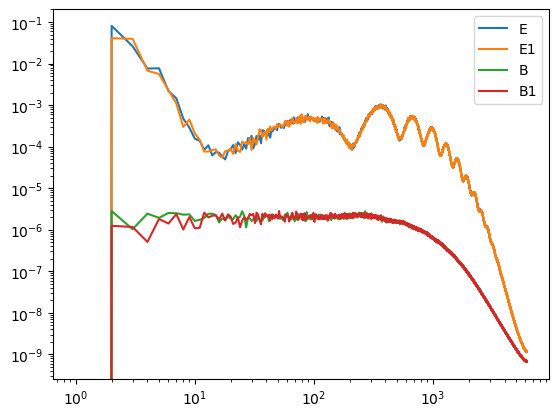

In [20]:
plt.loglog(hp.alm2cl(elm),label='E')
plt.loglog(hp.alm2cl(elm1),label='E1')
plt.loglog(hp.alm2cl(blm),label='B')
plt.loglog(hp.alm2cl(blm1),label='B1')
plt.legend()

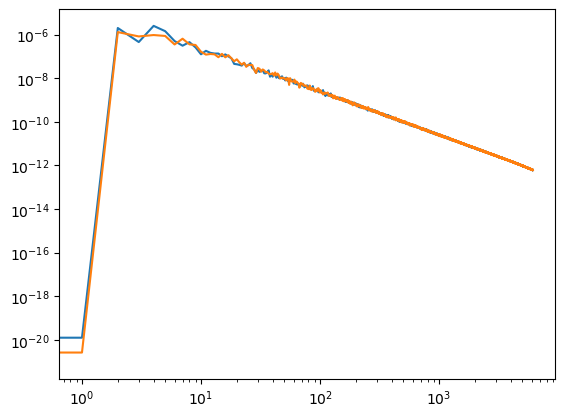

In [21]:
plt.loglog(hp.alm2cl(alm))
plt.loglog(hp.alm2cl(alm1))

In [22]:
np.radians(-1.0e-3)

-1.7453292519943296e-05